First 5 rows of the Iris dataset
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

 Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


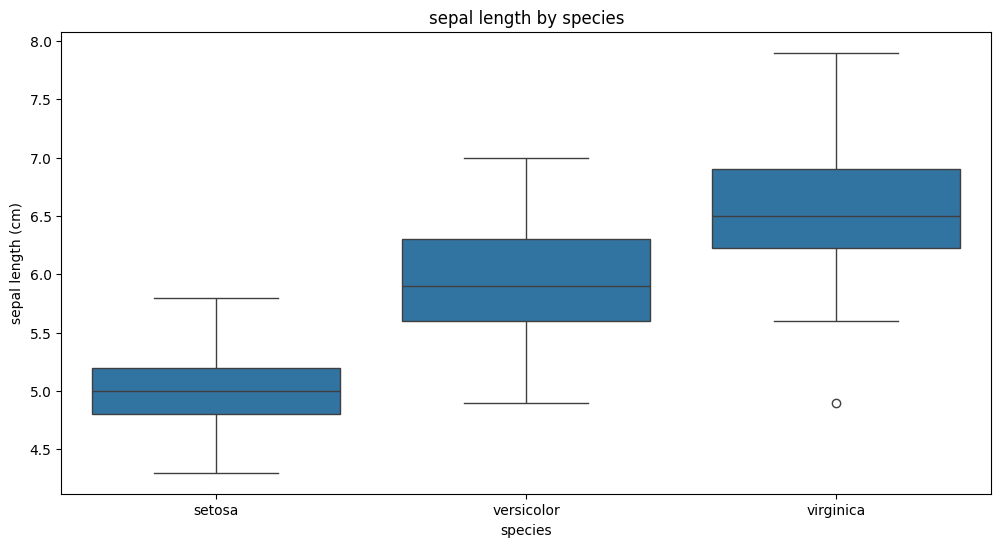



===T-TEST IMPLEMENTATION===
comparing sepal lengths between setosa and versicolor species
t-statistic: -10.52098626754911
p-value: 8.985235037487079e-18
Reject the null hypothesis: there is a significant difference between the means
====ANOVA IMPLEMENTATION====
comparing sepal lengths between setosa,versicolor and virginica species
f-statistic: 119.26450218450468
p-value: 1.6696691907693826e-31
Reject the null hypothesis: there is a significant difference between the means

 performing post_hoc Tukey HST Test
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


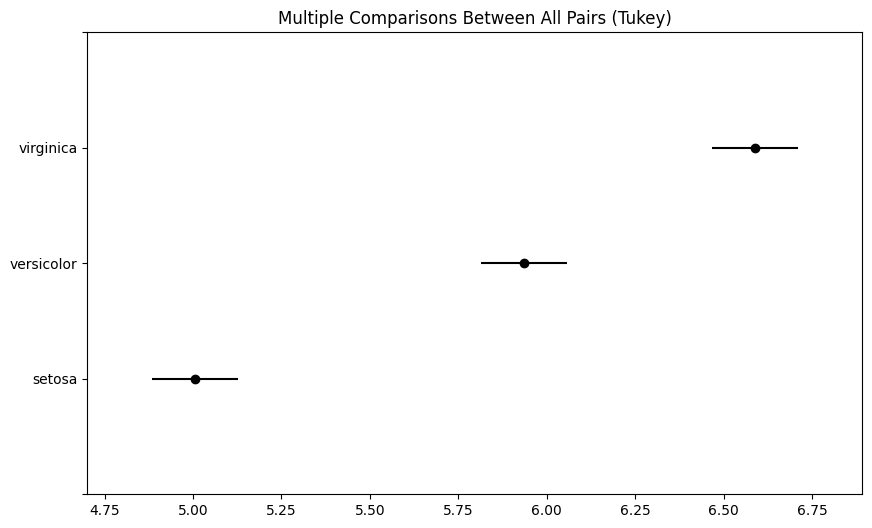

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Import the load_iris function
from sklearn.datasets import load_iris

iris= load_iris()
# The DataFrame creation had two 'columns' arguments, the second one overwrites the first.
# Also, the mapping should be applied to the 'target' column *after* the DataFrame is created.
# Let's fix the DataFrame creation and then map the target values to species names.
iris_df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris_df['target'] = iris_df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
# Rename the target column to 'species' for clarity
iris_df.rename(columns={'target': 'species'}, inplace=True)


print("First 5 rows of the Iris dataset")
print(iris_df.head())
print("\n Basic statistics:")
display(iris_df.describe())

# The plot function was misspelled as 'pli'. It should be 'plt'.
plt.figure(figsize=(12,6))
sns.boxplot(x='species',y='sepal length (cm)',data=iris_df)
plt.title('sepal length by species')
plt.show()

print("\n\n===T-TEST IMPLEMENTATION===")
print("comparing sepal lengths between setosa and versicolor species")
setosa_sepal=iris_df[iris_df['species']=='setosa']['sepal length (cm)']
versicolor_sepal=iris_df[iris_df['species']=='versicolor']['sepal length (cm)']
t_stat,p_value=stats.ttest_ind(setosa_sepal,versicolor_sepal)
print("t-statistic:",t_stat)
print("p-value:",p_value)
alpha=0.05
if p_value<alpha:
                     print("Reject the null hypothesis: there is a significant difference between the means")
else:
                     print("Rail to reject the null hypothesis: No significant difference between the means")

print("====ANOVA IMPLEMENTATION====")
print("comparing sepal lengths between setosa,versicolor and virginica species")
f_stat,p_value= stats.f_oneway(iris_df[iris_df['species']=='setosa']['sepal length (cm)'],iris_df[iris_df['species']=='versicolor']['sepal length (cm)'],iris_df[iris_df['species']=='virginica']['sepal length (cm)'])
print("f-statistic:",f_stat)
print("p-value:",p_value)
if p_value<alpha:
                     print("Reject the null hypothesis: there is a significant difference between the means")
                     print("\n performing post_hoc Tukey HST Test")
                     # For Tukey HSD, ensure the dependent variable is the first argument and the groups are the second.
                     tukey_results=pairwise_tukeyhsd(endog=iris_df['sepal length (cm)'], groups=iris_df['species'], alpha=alpha)
                     print(tukey_results)
                     tukey_results.plot_simultaneous()
                     plt.show()
else:
                     print("Rail to reject the null hypothesis: No significant difference between the means")